<a href="https://colab.research.google.com/github/saif619/MachineLearningPython/blob/master/distractedDriver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distracted Driver Prediction

![](https://frontiersinblog.files.wordpress.com/2017/11/age-gender-personality-distracted-driving.jpg?w=940)

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
#!pip install pydrive

In [0]:

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
!wget  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0

--2020-03-03 18:33:48--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-03-03 18:33:48--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0bc06fd0578868625340ce6478.dl.dropboxusercontent.com/cd/0/inline/AzOlXfjvBPfWSIoLCY3d0xeVr7-vJleKf-LgpwD5pPixSOeJo3japMWNJmaXPxPHqcckiddPuXBvKpXhXCXHkE3w4JKoNW4JM6lHJrCC7SGq3A/file# [following]
--2020-03-03 18:33:48--  https://uc0bc06fd0578868625340ce6478.dl.dropboxusercontent.com/cd/0/inline/AzOlXfjvBPfWSIoLCY3d0xeVr7-vJleKf-LgpwD5

In [0]:
import os
os.listdir()

['.config',
 'adc.json',
 'state-farm-distracted-driver-detection.zip?dl=0',
 'gdrive',
 'sample_data']

In [0]:
!unzip state-farm-distracted-driver-detection.zip\?dl\=0

Archive:  state-farm-distracted-driver-detection.zip?dl=0
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                



In [0]:
#file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
#for file1 in file_list:
#  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [0]:
downloaded = drive.CreateFile({'id': '1CllBVu2QC1sNKupKz632IsPTB2LU7C36'})
downloaded.GetContentFile('distracted_driver3march.h5')

In [0]:
# Uncomment the below and run

In [0]:
os.mkdir('driver_valid')

In [0]:
os.listdir()

['.config',
 'adc.json',
 'state-farm-distracted-driver-detection.zip?dl=0',
 'driver_imgs_list.csv',
 'sample_submission.csv',
 'imgs.zip',
 'driver_valid',
 'gdrive',
 'sample_data']

In [0]:
# Uncomment the below and run

In [0]:
#!unzip imgs.zip

### **Importing required libraries**

In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import MobileNet, DenseNet201, InceptionV3, VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Using TensorFlow backend.


### Creating validation data

In [0]:
data = pd.read_csv('driver_imgs_list.csv')

In [0]:
data.head(3)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg


In [0]:
data['subject'].value_counts()

p021    1237
p022    1233
p024    1226
p026    1196
p016    1078
p066    1034
p049    1011
p051     920
p014     876
p015     875
p035     848
p047     835
p081     823
p012     823
p064     820
p075     814
p061     809
p056     794
p050     790
p052     740
p002     725
p045     724
p039     651
p041     605
p042     591
p072     346
Name: subject, dtype: int64

In [0]:
val_data = data.loc[((data['subject'] == 'p035') | (data['subject'] == 'p051')), :]

In [0]:
val_data.head()

,subject,classname,img
9269,p035,c0,img_66660.jpg
9270,p035,c0,img_89362.jpg
9271,p035,c0,img_13584.jpg
9272,p035,c0,img_4400.jpg
9273,p035,c0,img_48340.jpg


In [0]:
val_data['classname'].value_counts()

c0    276
c6    189
c9    173
c3    172
c5    172
c4    170
c2    169
c7    167
c1    162
c8    118
Name: classname, dtype: int64

In [0]:
x = val_data['classname'].values
x = x.tolist()

In [0]:
y = val_data['img'].values
y = y.tolist()

In [0]:
from os.path import join

image_dir = 'train/'
img_paths = [join(image_dir, x[i], y[i]) for i in range(1453)]

In [0]:
#img_paths[820:], len(img_paths)
val_data.shape

(1768, 3)

In [0]:
 dirs = ['c8', 'c5', 'c2', 'c1', 'c4', 'c0', 'c6', 'c7', 'c3', 'c9']

In [0]:
cd ./driver_valid

/content/driver_valid


In [0]:
for i in dirs:
 os.mkdir(i)

In [0]:
os.listdir()

['c8', 'c6', 'c5', 'c1', 'c3', 'c0', 'c7', 'c4', 'c2', 'c9']

In [0]:
cd ..

/content


In [0]:
import shutil, os

for f in img_paths:
    shutil.move(f, 'driver_valid/'+f.split('/')[1])

In [0]:
os.listdir('train')

['c8', 'c6', 'c5', 'c1', 'c3', 'c0', 'c7', 'c4', 'c2', 'c9']

In [0]:
cd ./driver_valid

/content/driver_valid


In [0]:
cd ..

/content


## Model

In [0]:
os.listdir()

['.config',
 'adc.json',
 'train',
 'state-farm-distracted-driver-detection.zip?dl=0',
 'driver_imgs_list.csv',
 'sample_submission.csv',
 'test',
 'imgs.zip',
 'driver_valid',
 'gdrive',
 'sample_data']

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Dropout, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Flatten, LeakyReLU, DepthwiseConv2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

In [0]:
train_path = 'train'
test_path = 'test'
valid_path = 'driver_valid'
target_size = (100, 100)
colormode = 'rgb'
seed = 666
batch_size = 64
input_shape = (100, 100, 3)
reg = None # l2(0.0001)
axis = -1 # For BatchNormalization layers

# Creating ImageDataGenerator, which rescales images 
# and splits train data into train and validation sets 
# with 0.9 / 0.1 proportion
datagen = ImageDataGenerator(rescale = 1.0/255.0, validation_split = 0.1)
#datagen = ImageDataGenerator(rescale = 1.0/255.0)

# Creating train, valid and test generators
train_generator = datagen.flow_from_directory(directory = train_path, # Path to directory which contains images classes
                                             target_size = target_size, # Whether resize images or not
                                             color_mode = colormode, 
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True,
                                             seed = seed,
                                             subset = 'training') # Train or validation dataset

valid_generator = datagen.flow_from_directory(directory = train_path,
                                             target_size = target_size,
                                             color_mode = colormode,
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True,
                                             seed = seed,
                                             subset = 'validation')

test_generator = datagen.flow_from_directory(directory = valid_path,
                                            target_size = target_size,
                                            color_mode = colormode,
                                            batch_size = 1,
                                            class_mode = None,
                                            shuffle = False, 
                                            seed = seed)

# Define number of steps for fit_generator function
STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size

Found 18879 images belonging to 10 classes.
Found 2092 images belonging to 10 classes.
Found 1453 images belonging to 10 classes.


In [0]:
momentum = 0.9

model = Sequential()
model.add(Conv2D(64, 3, input_shape = input_shape, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = reg))
model.add(BatchNormalization(momentum = momentum, center=True, scale=False))
model.add(Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = reg))
model.add(BatchNormalization(momentum = momentum, center=True, scale=False))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = reg))
model.add(BatchNormalization(momentum = momentum, center=True, scale=False))
model.add(Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = reg))
model.add(BatchNormalization(momentum = momentum, center=True, scale=False))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = reg))
model.add(BatchNormalization(momentum = momentum, center=True, scale=False))
model.add(Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = reg))
model.add(BatchNormalization(momentum = momentum, center=True, scale=False))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = reg))
model.add(BatchNormalization(momentum = momentum, center=True, scale=False))
model.add(Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = reg))
model.add(BatchNormalization(momentum = momentum, center=True, scale=False))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = reg))
model.add(BatchNormalization(momentum = momentum, center=True, scale=False))
model.add(Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = reg))
model.add(BatchNormalization(momentum = momentum, center=True, scale=False))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(512, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(10, activation = 'softmax'))

# model.summary()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
checkpoint = ModelCheckpoint('../best_model.h5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)

In [0]:
history = model.fit_generator(generator = train_generator,
                             steps_per_epoch = STEP_SIZE_TRAIN,
                             validation_data = valid_generator,
                             validation_steps = STEP_SIZE_VALID,
                             epochs = 5, callbacks = [checkpoint])

Epoch 1/5
294/294 [==============================] - 101s 342ms/step - loss: 1.1432 - acc: 0.6772 - val_loss: 0.2857 - val_acc: 0.9004
Epoch 2/5
294/294 [==============================] - 95s 323ms/step - loss: 0.1515 - acc: 0.9535 - val_loss: 0.2254 - val_acc: 0.9341
Epoch 3/5
294/294 [==============================] - 94s 320ms/step - loss: 0.0904 - acc: 0.9719 - val_loss: 0.2722 - val_acc: 0.9316
Epoch 4/5
294/294 [==============================] - 94s 319ms/step - loss: 0.0762 - acc: 0.9758 - val_loss: 0.1090 - val_acc: 0.9727
Epoch 5/5
294/294 [==============================] - 95s 323ms/step - loss: 0.0499 - acc: 0.9849 - val_loss: 0.0862 - val_acc: 0.9771


## Predict on valid

In [0]:
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size
test_generator.reset()
preds = model.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)

1453/1453 [==============================] - 9s 6ms/step


In [0]:
predicted_class_indices = np.argmax(preds, axis = 1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
y_pred = [labels[k] for k in predicted_class_indices]
y_true = [labels[k] for k in test_generator.labels]

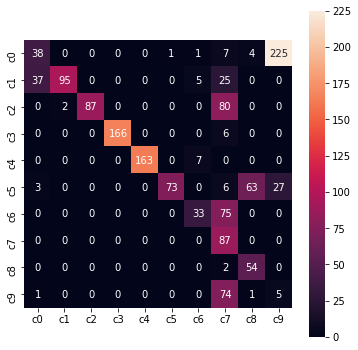

In [0]:
l = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
confusion = confusion_matrix(y_true, y_pred)
fig = plt.figure(figsize = (6, 6))
sns.heatmap(confusion, annot = True, fmt = 'd', xticklabels = l, yticklabels = l, square = True)

['c0/img_100074.jpg', 'c0/img_100542.jpg', 'c0/img_100824.jpg', 'c0/img_101091.jpg']


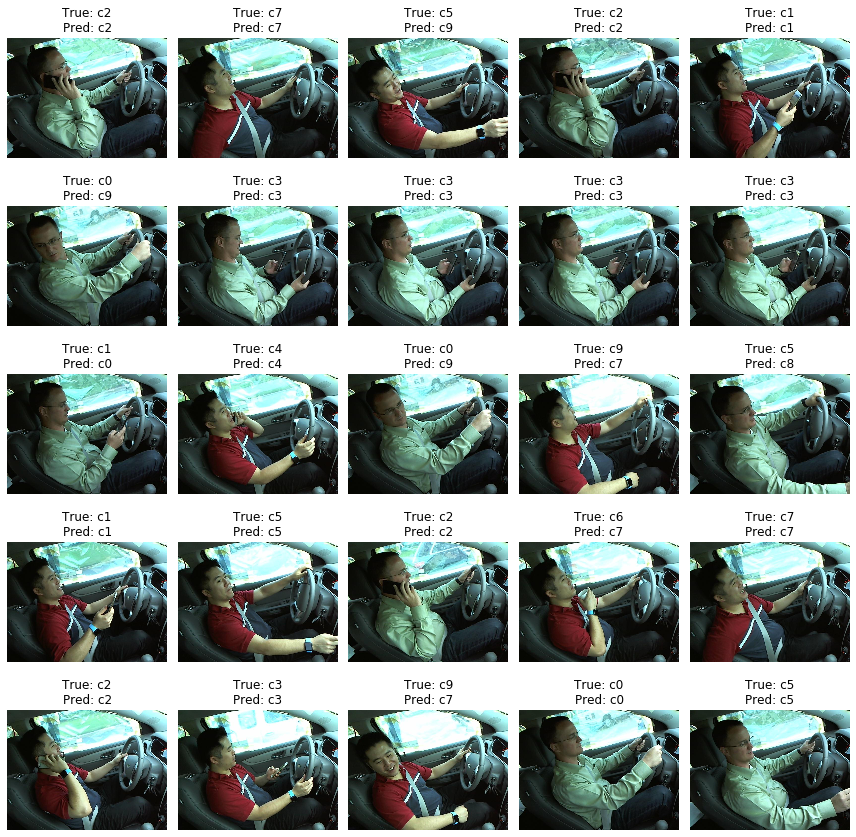

In [0]:
filenames = test_generator.filenames
print(filenames[:4])
rows, cols = (5, 5)

fig = plt.figure(figsize = (12, 12))
for i in range(rows * cols):
    r = np.random.randint(0, len(filenames))
    image_path = valid_path + '/' + filenames[r]
    image = cv.imread(image_path)
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(image[:, :, ::-1])
    plt.title(f'True: {filenames[r].split("/")[0]}\nPred: {y_pred[r]}')
    plt.axis('off')

plt.tight_layout()

## Predict on Test and Submit

In [0]:
submission = pd.read_csv('sample_submission.csv')

In [0]:
submission.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [0]:
submission.index

RangeIndex(start=0, stop=79726, step=1)

In [0]:
y = submission['img'].values
y = y.tolist()

In [0]:
sub = submission.set_index('img')

In [0]:
sub.index.names = [None] 

In [0]:
sub.shape

(79726, 10)

In [0]:
os.mkdir('pred_dir')

In [0]:
shutil.move('test', 'pred_dir/')

'pred_dir/test'

In [0]:
datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [0]:
os.listdir()

['.config',
 'adc.json',
 'train',
 'state-farm-distracted-driver-detection.zip?dl=0',
 'driver_imgs_list.csv',
 'sample_submission.csv',
 'submission_distracted_driver.csv',
 'imgs.zip',
 'pred_dir',
 'driver_valid',
 'gdrive',
 'sample_data']

In [0]:
new_test_generator = datagen.flow_from_directory(directory = 'pred_dir',
                                            target_size = target_size,
                                            color_mode = colormode,
                                            batch_size = 1,
                                            class_mode = None,
                                            shuffle = False, 
                                            seed = 1)

Found 79726 images belonging to 1 classes.


In [0]:
STEP_SIZE_TEST = new_test_generator.n // new_test_generator.batch_size
new_test_generator.reset()
preds = model.predict_generator(new_test_generator, steps = STEP_SIZE_TEST, verbose = 1)

79726/79726 [==============================] - 482s 6ms/step


In [0]:
predicted_class_indices = np.argmax(preds, axis = 1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
y_pred = [labels[k] for k in predicted_class_indices]

predicted = preds.tolist()



In [0]:
new_test_generator.classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
img_paths = os.listdir('pred_dir/test/')


In [0]:
img_paths.sort()
img_paths[1]

'img_10.jpg'

In [0]:
sub = pd.DataFrame(list(zip(img_paths, y_pred)), columns=['images', 'predicted_classes'])

In [0]:
sub.head()

,images,predicted_classes
0,img_1.jpg,c5
1,img_10.jpg,c5
2,img_100.jpg,c0
3,img_1000.jpg,c8
4,img_100000.jpg,c3


In [0]:
sub.to_csv('submission_distracted_driver.csv',index=False)

In [0]:
from google.colab import files
files.download( "./submission_distracted_driver.csv") 

## Save weights

In [0]:
model.save_weights("/content/gdrive/My Drive/distracted_driver3march.h5")